# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


In [43]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = 'right')

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [44]:
# Checking the number of mice.  ------ class notes
mice_count = mouse_data['Mouse ID'].nunique()
mice_count

249

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint    ------ class notes
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_count = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice_count['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [46]:
# Optional: Get all the data for the duplicate mouse ID.    ------ class notes
duplicate_mice_data = mouse_data[mouse_data['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mouse_data[mouse_data['Mouse ID'] != 'g989'].drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [48]:
# Checking the number of mice in the clean DataFrame.   -------------class notes  
number_of_mice_clean = clean_mice_data['Mouse ID'].nunique()
number_of_mice_clean

248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# --------- https://www.geeksforgeeks.org/create-the-mean-and-standard-deviation-of-the-data-of-a-pandas-series/
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_mice_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_stats = summary_stats['Tumor Volume (mm3)'].mean()
median_tumor_stats = summary_stats['Tumor Volume (mm3)'].median()
standard_deviation_tumor_stats = summary_stats['Tumor Volume (mm3)'].std()
sem_tumor_stats = summary_stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_combined = pd.DataFrame({'mean': mean_tumor_stats, 'median': median_tumor_stats,
                                   'standard deviation': standard_deviation_tumor_stats, 'SEM': sem_tumor_stats})

summary_stats_combined.head(10)

,mean,median,standard deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# ---------   https://www.geeksforgeeks.org/create-the-mean-and-standard-deviation-of-the-data-of-a-pandas-series/
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_aggregation = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median']).rename(columns={'mean': '    ', 'median': 'Tumor Volume (mm3)'})

summary_stats_aggregation

,,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


## Bar and Pie Charts

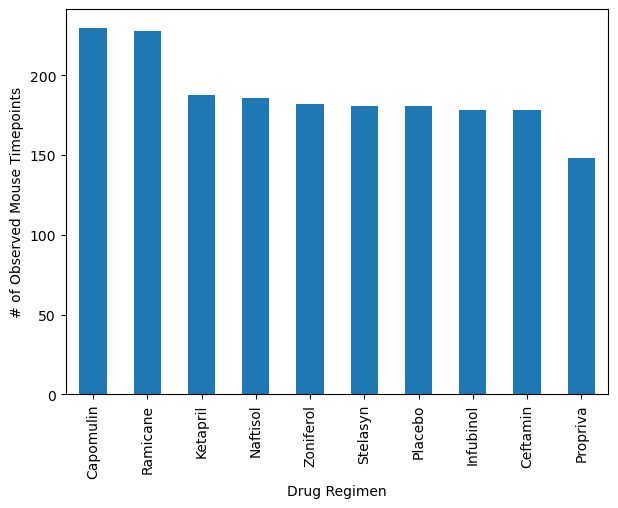

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

regimen_counts = clean_mice_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(7,5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

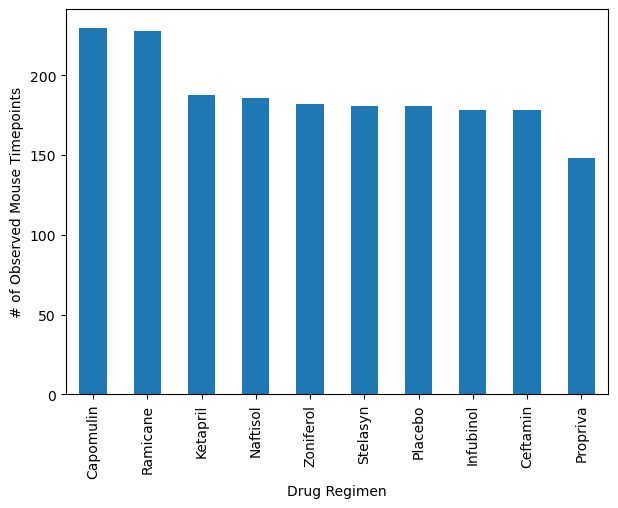

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

regimen_counts = clean_mice_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar',figsize=(7, 5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

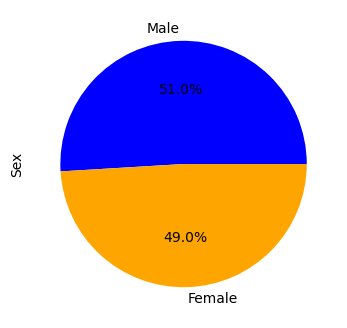

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
gender_data = clean_mice_data['Sex'].value_counts()
plt.figure(figsize=(4,4)) 
gender_data.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange']) 

plt.ylabel('Sex')
plt.show()

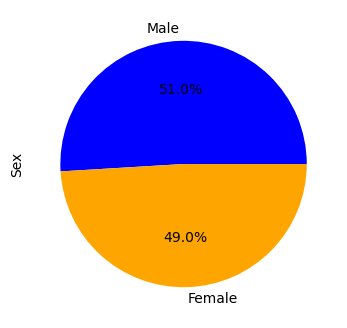

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
gender_distribution = clean_mice_data['Sex'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
clean_mice_data['Timepoint'] = clean_mice_data.loc[:,'Timepoint'].astype(object)
greatest_timepoint_groupby = clean_mice_data.groupby(['Drug Regimen','Mouse ID']).max()

greatest_timepoint_groupby

drug_groupby = clean_mice_data.groupby(['Drug Regimen']).max()

drug_groupby




,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,y793,Male,24,25,45,48.158209,3
Ceftamin,y865,Male,24,30,45,68.923185,4
Infubinol,z581,Male,24,30,45,72.226731,4
Ketapril,y260,Male,24,30,45,78.567014,4
Naftisol,z969,Male,23,30,45,76.668817,4
Placebo,y478,Male,21,30,45,73.212939,4
Propriva,z435,Male,24,30,45,72.455421,4
Ramicane,z578,Male,23,25,45,47.622816,3
Stelasyn,z314,Male,23,30,45,75.123690,4


In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.sort_values.html

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(clean_mice_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'timepoint_max'})
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_and_last_greatest_timepoint_merge = pd.merge(clean_mice_data, greatest_timepoint, on='Mouse ID')
clean_and_last_greatest_timepoint_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,timepoint_max
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45
...,...,...,...,...,...,...,...,...,...
1875,m601,Capomulin,Male,22,17,25,33.118756,1,45
1876,m601,Capomulin,Male,22,17,30,31.758275,1,45
1877,m601,Capomulin,Male,22,17,35,30.834357,1,45
1878,m601,Capomulin,Male,22,17,40,31.378045,1,45


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_and_last_greatest_timepoint_merge.loc[clean_and_last_greatest_timepoint_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    drug_values.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: 1686    25.472143
1687    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


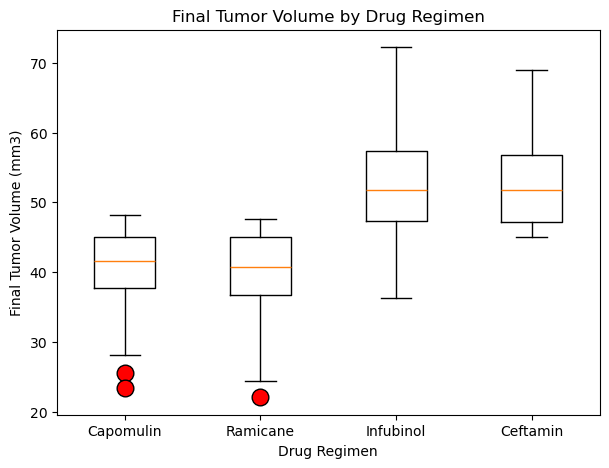

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# https://python-graph-gallery.com/boxplot/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html
fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(drug_values, labels=drugs, 
           flierprops={'marker': 'o', 'color': 'red', 'markerfacecolor': 'red', 'markersize': 12})
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

In [100]:
#mouse_data_number_lookup = clean_mice_data.loc[clean_mice_data['Mouse ID'] == '1509']
#mouse_data_number_look
# https://stackoverflow.com/questions/20130227/how-to-connect-scatterplot-points-with-line-using-matplotlib
Specific_mouse_find = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']
print(Specific_mouse_find)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
226      j246    Capomulin  Female          21          21          0   
227      r554    Capomulin  Female           8          17          0   
228      s185    Capomulin  Female           3          17          0   
229      b742    Capomulin    Male           7          21          0   
...       ...          ...     ...         ...         ...        ...   
1854     s710    Capomulin  Female           1          23         45   
1859     j119    Capomulin  Female           7          23         45   
1878     i557    Capomulin  Female           1          24         45   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
226            45.000000         

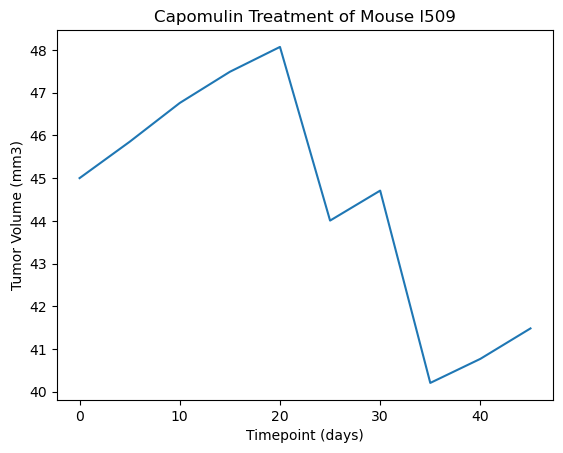

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
specific_mouse = clean_mice_data.loc[clean_mice_data['Mouse ID'] == 'l509']
# https://stackoverflow.com/questions/20130227/how-to-connect-scatterplot-points-with-line-using-matplotlib
plt.plot(specific_mouse['Timepoint'], specific_mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

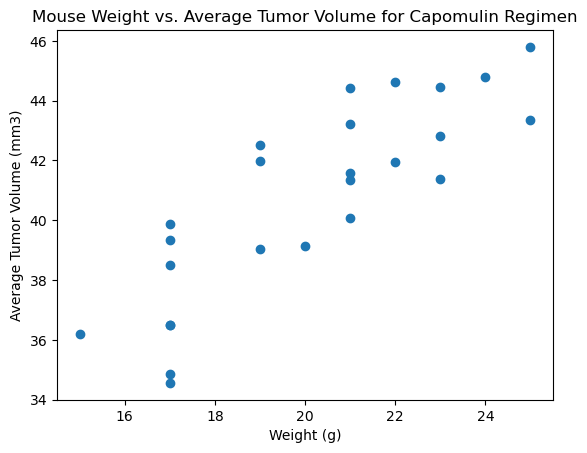

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# https://www.geeksforgeeks.org/how-to-connect-scatterplot-points-with-line-in-matplotlib/
capomulin_data = clean_mice_data[clean_mice_data['Drug Regimen'] == 'Capomulin']


avg_tumor_vol_by_mouse = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'mean')  # Assuming weight doesn't change, mean will give the actual weight
)

plt.scatter(avg_tumor_vol_by_mouse['weight'], avg_tumor_vol_by_mouse['avg_tumor_volume'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

In [103]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
clean_mice_data_Weight = clean_and_last_greatest_timepoint_merge.groupby('Mouse ID')['Weight (g)'].first().reset_index()
clean_mice_data_Weight

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

capomulin_weights_volumes = pd.merge(average_tumor_volume, clean_mice_data_Weight, on='Mouse ID')


In [104]:
x_values = capomulin_weights_volumes['Weight (g)']
y_values = capomulin_weights_volumes['Tumor Volume (mm3)']


In [105]:
(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept

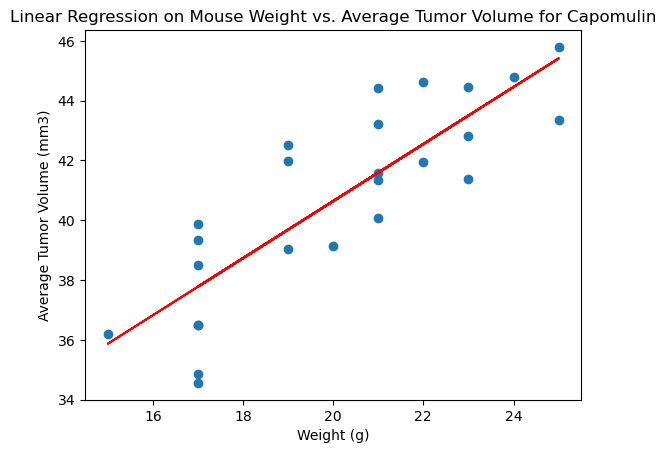

The correlation between mouse weight and the average tumor volume is: 0.84


In [106]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-") 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression on Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is: {r_value:.2f}")
